<a href="https://colab.research.google.com/github/Gonzal22/Actividad-4/blob/main/regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [168]:
df=pd.read_csv("DF_Mexico.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [169]:
df.shape

(24224, 75)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [171]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

In [172]:
df= df.drop(['neighbourhood_group_cleansed'], axis=1)
df= df.drop(['bathrooms'], axis=1)
df= df.drop(['calendar_updated'], axis=1)
df= df.drop(['license'], axis=1)

In [173]:
data=df.fillna(method="bfill")

In [174]:
data=df.fillna(method="ffill")

In [175]:
data["host_response_rate"]= data["host_response_rate"].replace("%","",regex=True).astype(float)
data["host_acceptance_rate"]= data["host_acceptance_rate"].replace("%","",regex=True).astype(float)
data["price"] = data["price"].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-175-80e079139185>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["price"] = data["price"].str.replace('$', '').str.replace(',', '').astype(float)


In [176]:
media = data["host_acceptance_rate"].mean()
data["host_acceptance_rate"].fillna(media, inplace=True)

In [177]:
df2=data.copy()

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24223 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [179]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("\nLimite superior permitido", Limite_Superior_iqr)
print("\nLimite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data




Limite superior permitido id                                              1.690170e+18
scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_response_rate                              1.000000e+02
host_acceptance_rate                            1.075000e+02
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.161500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+

<ipython-input-179-846d35dd1302>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-179-846d35dd1302>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3
<ipython-input-179-846d35dd1302>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,10531228,...,5.00,4.95,5.00,4.86,NaN,3.0,3.0,0.0,0.0,0.19
1,2072354,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,16840050,...,4.93,5.00,4.95,4.84,NaN,2.0,2.0,0.0,0.0,0.54
2,696037,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,3531879,...,4.92,4.92,4.58,4.71,NaN,3.0,3.0,0.0,0.0,0.31
3,35797,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,153786,...,4.92,4.92,4.58,4.71,NaN,1.0,1.0,0.0,0.0,0.31
4,44616,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,196253,...,4.87,4.78,4.98,4.48,NaN,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,488030249,...,5.00,5.00,5.00,5.00,NaN,2.0,2.0,0.0,0.0,1.00
24220,853966732274073000,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,506816029,...,5.00,5.00,5.00,5.00,NaN,1.0,1.0,0.0,0.0,1.00
24221,854225071295768399,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,154670560,...,5.00,5.00,5.00,5.00,NaN,1.0,0.0,1.0,0.0,1.00
24222,854247693069190865,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,7799414,...,5.00,5.00,5.00,5.00,NaN,13.0,13.0,0.0,0.0,1.00


In [180]:
data1= data.drop(["listing_url", "last_scraped", "source", "name", "description", "neighborhood_overview", "picture_url", "instant_bookable",
                 "host_id", "host_url", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate",
                 "host_acceptance_rate", "host_is_superhost", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_verifications",
                 "host_has_profile_pic", "host_identity_verified", "neighbourhood", "neighbourhood_cleansed", "property_type", "room_type","bathrooms_text",
                 "amenities","price","has_availability","calendar_last_scraped","first_review","last_review"],axis=1)
data1

,id,scrape_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,20230329041210,3.0,7.0,19.353530,-99.162990,3.0,1.0,1.0,1.0,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,2072354,20230329041210,3.0,3.0,19.353580,-99.169480,2.0,1.0,1.0,3.0,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,696037,20230329041210,4.0,4.0,19.441800,-99.184020,6.0,3.0,3.0,NaN,...,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
3,35797,20230329041210,1.0,1.0,19.382830,NaN,2.0,1.0,1.0,1.0,...,4.71,4.92,4.92,4.58,4.71,1.0,1.0,0.0,0.0,0.31
4,44616,20230329041210,16.0,16.0,19.411620,-99.177940,NaN,NaN,NaN,1.0,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,20230329041210,3.0,4.0,19.396663,-99.148145,2.0,1.0,1.0,3.0,...,5.00,5.00,5.00,5.00,5.00,2.0,2.0,0.0,0.0,1.00
24220,853966732274073000,20230329041210,1.0,1.0,19.392023,-99.118722,7.0,2.0,3.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24221,854225071295768399,20230329041210,1.0,6.0,19.371088,-99.190186,2.0,2.0,1.0,NaN,...,5.00,5.00,5.00,5.00,5.00,1.0,0.0,1.0,0.0,1.00
24222,854247693069190865,20230329041210,13.0,13.0,19.403792,-99.164978,2.0,1.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,13.0,13.0,0.0,0.0,1.00


In [181]:
data2 = df2[["host_acceptance_rate", "host_response_rate", "price", "number_of_reviews",
          "review_scores_location", "review_scores_cleanliness", "availability_365", "reviews_per_month", "review_scores_communication","room_type"]]

data2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,room_type
0,91.289737,100.0,1434.0,21,5.00,4.95,324,0.19,4.95,Entire home/apt
1,91.289737,100.0,830.0,61,4.95,4.88,346,0.54,5.00,Entire home/apt
2,90.000000,100.0,1469.0,39,4.58,4.71,87,0.31,4.92,Entire home/apt
3,90.000000,100.0,3658.0,0,4.58,4.71,363,0.31,4.92,Entire home/apt
4,86.000000,100.0,18000.0,64,4.98,4.70,357,0.46,4.78,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
24219,100.000000,100.0,760.0,0,5.00,5.00,352,1.00,5.00,Entire home/apt
24220,100.000000,100.0,1520.0,0,5.00,5.00,365,1.00,5.00,Entire home/apt
24221,96.000000,100.0,533.0,0,5.00,5.00,180,1.00,5.00,Private room
24222,100.000000,100.0,1200.0,0,5.00,5.00,344,1.00,5.00,Entire home/apt


In [182]:
private_room_data = data2[data2["room_type"] == "Private room"]
shared_room_data = df2[df2['room_type'] == 'Shared room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

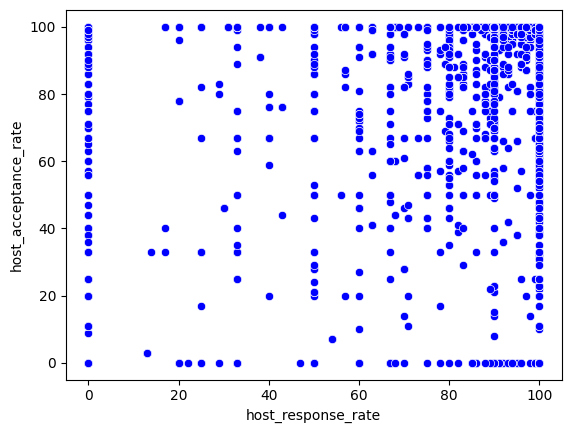

In [183]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=private_room_data)

In [184]:
Vars_Indep= private_room_data[['host_response_rate']]
Var_Dep= private_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [185]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3747922]),
 'rank_': 1,
 'singular_': array([2130.80139075]),
 'intercept_': 53.24119420065673}

In [186]:
y_pred= model.predict(X=private_room_data[['host_response_rate']])
private_room_data.insert(0, 'Predicciones1', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones1  host_acceptance_rate  host_response_rate   price  \
7          90.720415                 100.0               100.0  1089.0   
16         86.972493                   0.0                90.0   726.0   
17         53.241194                   0.0                 0.0   375.0   
18         53.241194                   0.0                 0.0  2835.0   
21         90.720415                  99.0               100.0  1244.0   
...              ...                   ...                 ...     ...   
24200      90.720415                 100.0               100.0  1280.0   
24213      53.241194                  99.0                 0.0   750.0   
24215      90.720415                 100.0               100.0   600.0   
24218      90.720415                 100.0               100.0   251.0   
24221      90.720415                  96.0               100.0   533.0   

       number_of_reviews  review_scores_location  review_scores_cleanliness  \
7                     62        

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

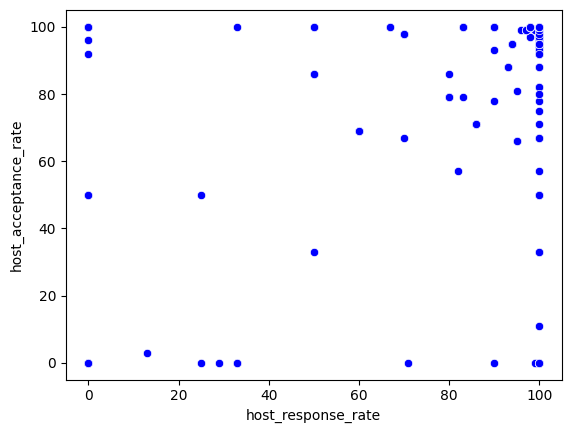

In [187]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=shared_room_data)

In [188]:
Vars_Indep= shared_room_data[['host_response_rate']]
Var_Dep= shared_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [189]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.38535469]),
 'rank_': 1,
 'singular_': array([443.73282402]),
 'intercept_': 50.20285361997221}

In [190]:
y_pred= model.predict(X=shared_room_data[['host_response_rate']])
shared_room_data.insert(0, 'Predicciones1.1', y_pred)
print(shared_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones1.1                  id  \
174          88.738323              617137   
437          69.470588             5272066   
443          84.884776             6076798   
472          88.738323             5434219   
499          88.738323             7480645   
...                ...                 ...   
23733        88.738323  845810769434337346   
23762        88.738323  844088337964077991   
23894        88.738323  850838789025926092   
23898        88.738323  847284366694948562   
24173        88.738323  855778058269530944   

                                           listing_url       scrape_id  \
174                https://www.airbnb.com/rooms/617137  20230329041210   
437               https://www.airbnb.com/rooms/5272066  20230329041210   
443               https://www.airbnb.com/rooms/6076798  20230329041210   
472               https://www.airbnb.com/rooms/5434219  20230329041210   
499               https://www.airbnb.com/rooms/7480645  20230329041210   
...

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

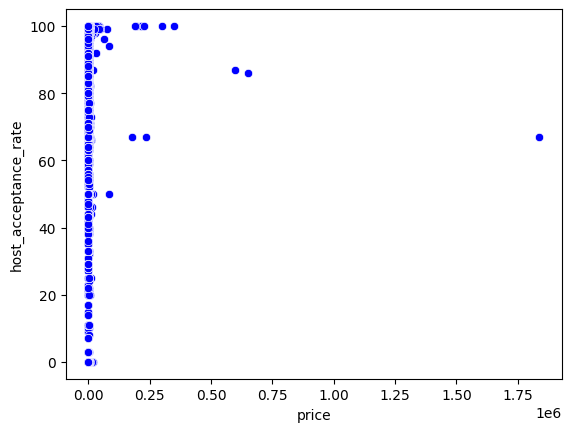

In [191]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=private_room_data)

In [192]:
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= private_room_data[['price']]
Var_Dep= private_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [193]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.58512387e-06]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 87.3662175450093}

In [194]:
y_pred= model.predict(X=private_room_data[['price']])
private_room_data.insert(0, 'Predicciones2', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones2  Predicciones1  host_acceptance_rate  host_response_rate  \
7          87.361224      90.720415                 100.0               100.0   
16         87.362889      86.972493                   0.0                90.0   
17         87.364498      53.241194                   0.0                 0.0   
18         87.353219      53.241194                   0.0                 0.0   
21         87.360514      90.720415                  99.0               100.0   
...              ...            ...                   ...                 ...   
24200      87.360349      90.720415                 100.0               100.0   
24213      87.362779      53.241194                  99.0                 0.0   
24215      87.363466      90.720415                 100.0               100.0   
24218      87.365067      90.720415                 100.0               100.0   
24221      87.363774      90.720415                  96.0               100.0   

        price  number_of_re

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

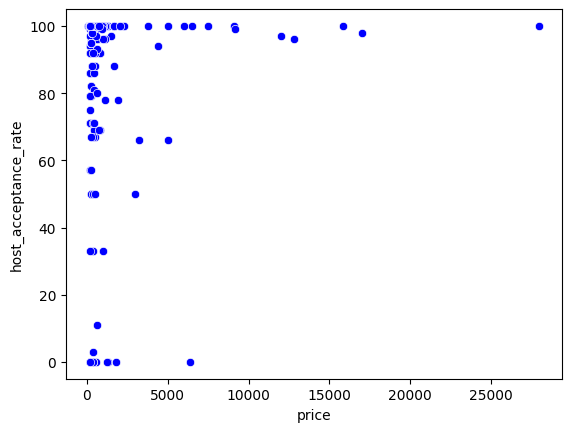

In [195]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=shared_room_data)

In [196]:
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= shared_room_data[['price']]
Var_Dep= shared_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [197]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0007114]),
 'rank_': 1,
 'singular_': array([43699.26481985]),
 'intercept_': 83.11652894771984}

In [198]:
y_pred= model.predict(X=shared_room_data[['price']])
shared_room_data.insert(0, 'Predicciones2.1', y_pred)
print(shared_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones2.1  Predicciones1.1                  id  \
174          84.407715        88.738323              617137   
437          83.246003        69.470588             5272066   
443          83.436658        84.884776             6076798   
472          83.310029        88.738323             5434219   
499          83.344176        88.738323             7480645   
...                ...              ...                 ...   
23733        83.294378        88.738323  845810769434337346   
23762        83.275882        88.738323  844088337964077991   
23894        83.628735        88.738323  850838789025926092   
23898        83.241735        88.738323  847284366694948562   
24173        83.284419        88.738323  855778058269530944   

                                           listing_url       scrape_id  \
174                https://www.airbnb.com/rooms/617137  20230329041210   
437               https://www.airbnb.com/rooms/5272066  20230329041210   
443               htt

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

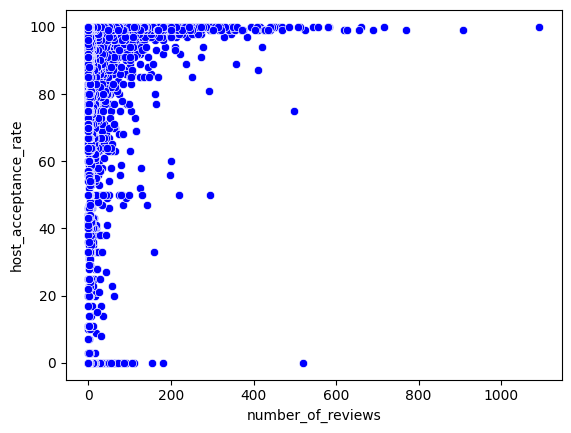

In [199]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room_data)

In [200]:
Vars_Indep= private_room_data[['number_of_reviews']]
Var_Dep= private_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [201]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.05583141]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 85.91439095508184}

In [202]:
y_pred= model.predict(X=private_room_data[['number_of_reviews']])
private_room_data.insert(0, 'Predicciones3', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones3  Predicciones2  Predicciones1  host_acceptance_rate  \
7          89.375938      87.361224      90.720415                 100.0   
16         86.193548      87.362889      86.972493                   0.0   
17         86.193548      87.364498      53.241194                   0.0   
18         85.914391      87.353219      53.241194                   0.0   
21         85.914391      87.360514      90.720415                  99.0   
...              ...            ...            ...                   ...   
24200      85.914391      87.360349      90.720415                 100.0   
24213      85.914391      87.362779      53.241194                  99.0   
24215      85.914391      87.363466      90.720415                 100.0   
24218      85.914391      87.365067      90.720415                 100.0   
24221      85.914391      87.363774      90.720415                  96.0   

       host_response_rate   price  number_of_reviews  review_scores_location  \
7      

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

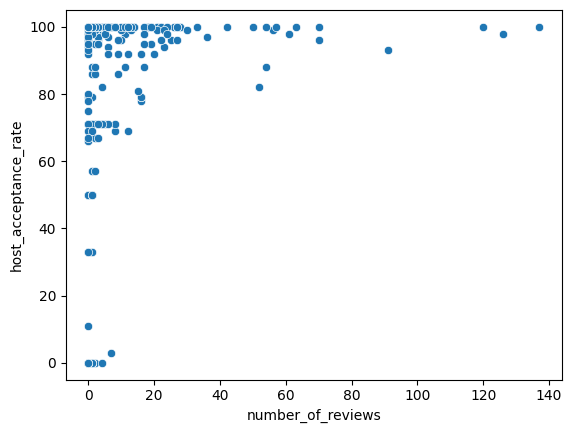

In [203]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', data=shared_room_data)

In [204]:
Vars_Indep= shared_room_data[['number_of_reviews']]
Var_Dep= shared_room_data['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [205]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29904021]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 81.25892792490833}

In [206]:
y_pred= model.predict(X=shared_room_data[['number_of_reviews']])
shared_room_data.insert(0, 'Predicciones3.1', y_pred)
print(shared_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones3.1  Predicciones2.1  Predicciones1.1                  id  \
174          81.258928        84.407715        88.738323              617137   
437          83.950290        83.246003        69.470588             5272066   
443         102.191743        83.436658        84.884776             6076798   
472          88.734933        83.310029        88.738323             5434219   
499         122.227437        83.344176        88.738323             7480645   
...                ...              ...              ...                 ...   
23733        81.258928        83.294378        88.738323  845810769434337346   
23762        81.258928        83.275882        88.738323  844088337964077991   
23894        81.258928        83.628735        88.738323  850838789025926092   
23898        81.258928        83.241735        88.738323  847284366694948562   
24173        81.258928        83.284419        88.738323  855778058269530944   

                                       

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

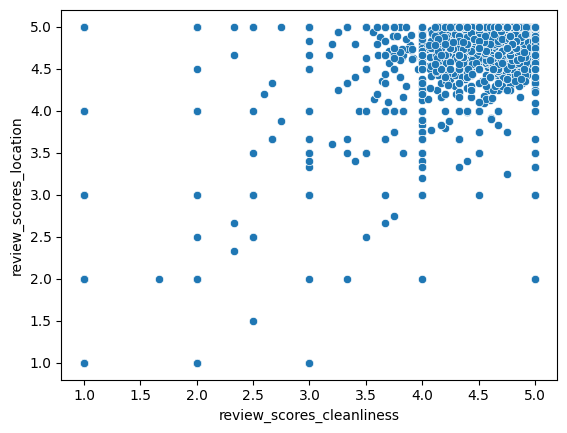

In [207]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', data=private_room_data)

In [208]:
Vars_Indep= private_room_data[['review_scores_cleanliness']]
Var_Dep= private_room_data['review_scores_location']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [209]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.64595306]),
 'rank_': 1,
 'singular_': array([49.57506174]),
 'intercept_': 1.765208445014344}

In [210]:
y_pred= model.predict(X=private_room_data[['review_scores_cleanliness']])
private_room_data.insert(0, 'Predicciones4', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones4  Predicciones3  Predicciones2  Predicciones1  \
7           4.930378      89.375938      87.361224      90.720415   
16          4.478211      86.193548      87.362889      86.972493   
17          4.736592      86.193548      87.364498      53.241194   
18          4.736592      85.914391      87.353219      53.241194   
21          4.891621      85.914391      87.360514      90.720415   
...              ...            ...            ...            ...   
24200       4.994974      85.914391      87.360349      90.720415   
24213       4.994974      85.914391      87.362779      53.241194   
24215       4.994974      85.914391      87.363466      90.720415   
24218       4.994974      85.914391      87.365067      90.720415   
24221       4.994974      85.914391      87.363774      90.720415   

       host_acceptance_rate  host_response_rate   price  number_of_reviews  \
7                     100.0               100.0  1089.0                 62   
16             

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

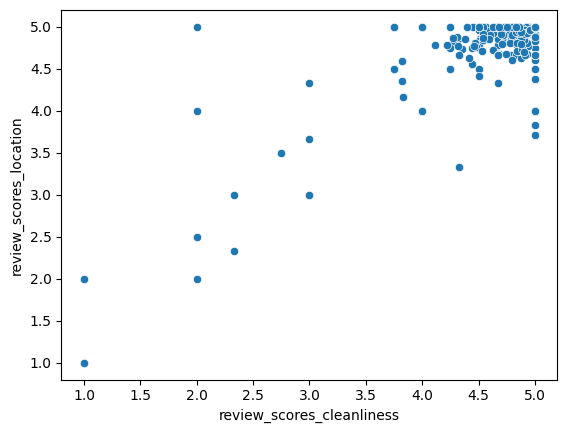

In [211]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', data=shared_room_data)

In [212]:
Vars_Indep= shared_room_data[['review_scores_cleanliness']]
Var_Dep= shared_room_data['review_scores_location']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [213]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.82463925]),
 'rank_': 1,
 'singular_': array([14.4909896]),
 'intercept_': 0.926344981696114}

In [214]:
y_pred= model.predict(X=shared_room_data[['review_scores_cleanliness']])
shared_room_data.insert(0, 'Predicciones4.1', y_pred)
print(shared_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones4.1  Predicciones3.1  Predicciones2.1  Predicciones1.1  \
174           5.000063        81.258928        84.407715        88.738323   
437           4.777410        83.950290        83.246003        69.470588   
443           4.991816       102.191743        83.436658        84.884776   
472           4.620729        88.734933        83.310029        88.738323   
499           4.736178       122.227437        83.344176        88.738323   
...                ...              ...              ...              ...   
23733         5.049541        81.258928        83.294378        88.738323   
23762         5.049541        81.258928        83.275882        88.738323   
23894         4.637222        81.258928        83.628735        88.738323   
23898         4.637222        81.258928        83.241735        88.738323   
24173         5.049541        81.258928        83.284419        88.738323   

                       id                                      listing_url 

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

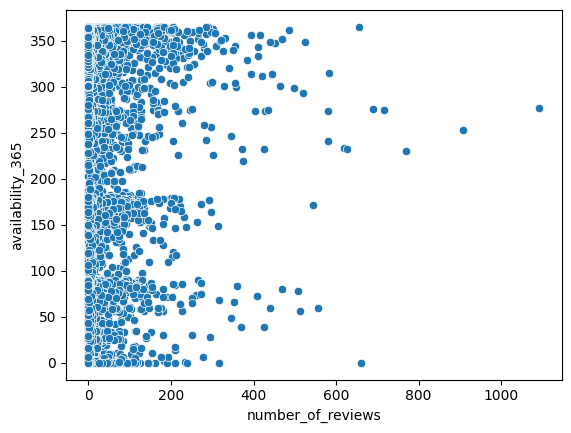

In [215]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', data=private_room_data)

In [216]:
Vars_Indep= private_room_data[['number_of_reviews']]
Var_Dep= private_room_data['availability_365']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [217]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

In [218]:
y_pred= model.predict(X=private_room_data[['number_of_reviews']])
private_room_data.insert(0, 'Predicciones5', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones5  Predicciones4  Predicciones3  Predicciones2  \
7         249.668483       4.930378      89.375938      87.361224   
16        255.006270       4.478211      86.193548      87.362889   
17        255.006270       4.736592      86.193548      87.364498   
18        255.474497       4.736592      85.914391      87.353219   
21        255.474497       4.891621      85.914391      87.360514   
...              ...            ...            ...            ...   
24200     255.474497       4.994974      85.914391      87.360349   
24213     255.474497       4.994974      85.914391      87.362779   
24215     255.474497       4.994974      85.914391      87.363466   
24218     255.474497       4.994974      85.914391      87.365067   
24221     255.474497       4.994974      85.914391      87.363774   

       Predicciones1  host_acceptance_rate  host_response_rate   price  \
7          90.720415                 100.0               100.0  1089.0   
16         86.972493   

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

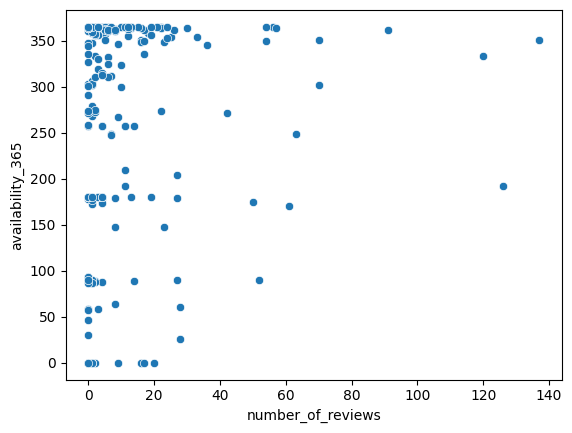

In [219]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', data=shared_room_data)

In [220]:
Vars_Indep= shared_room_data[['number_of_reviews']]
Var_Dep= shared_room_data['availability_365']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [221]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.22117208]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 297.8061064299387}

In [222]:
y_pred= model.predict(X=shared_room_data[['number_of_reviews']])
y_pred

array([297.80610643, 295.81555769, 282.32406064, 292.27680436,
       267.50553109, 297.80610643, 297.80610643, 297.58493435,
       277.6794469 , 297.80610643, 297.36376226, 294.26735311,
       295.15204144, 297.80610643, 297.80610643, 297.80610643,
       286.30515813, 296.9214181 , 297.80610643, 296.47907393,
       297.80610643, 292.71914853, 294.26735311, 297.80610643,
       297.58493435, 297.80610643, 297.36376226, 271.2654565 ,
       297.58493435, 291.61328811, 297.58493435, 294.93086935,
       297.58493435, 296.25790185, 297.80610643, 297.80610643,
       296.03672977, 297.58493435, 297.80610643, 297.58493435,
       297.80610643, 297.80610643, 297.80610643, 297.14259018,
       295.15204144, 292.94032061, 297.58493435, 297.36376226,
       297.58493435, 296.9214181 , 296.03672977, 296.70024602,
       297.14259018, 297.58493435, 293.60383686, 296.70024602,
       297.14259018, 297.14259018, 297.80610643, 297.58493435,
       295.81555769, 285.4204698 , 284.31460938, 297.58

In [223]:
shared_room_data.insert(0, 'Predicciones5.1', y_pred)
shared_room_data

,Predicciones5.1,Predicciones4.1,Predicciones3.1,Predicciones2.1,Predicciones1.1,id,listing_url,scrape_id,last_scraped,source,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
174,297.806106,5.000063,81.258928,84.407715,88.738323,617137,https://www.airbnb.com/rooms/617137,20230329041210,2023-03-30,city scrape,...,4.94,5.00,5.00,4.75,f,1,0,0,1,0.21
437,295.815558,4.777410,83.950290,83.246003,69.470588,5272066,https://www.airbnb.com/rooms/5272066,20230329041210,2023-03-30,city scrape,...,4.89,5.00,4.78,4.89,f,2,0,0,2,0.10
443,282.324061,4.991816,102.191743,83.436658,84.884776,6076798,https://www.airbnb.com/rooms/6076798,20230329041210,2023-03-29,city scrape,...,4.94,4.91,4.68,4.93,t,1,0,0,1,0.73
472,292.276804,4.620729,88.734933,83.310029,88.738323,5434219,https://www.airbnb.com/rooms/5434219,20230329041210,2023-03-30,city scrape,...,4.68,4.72,4.80,4.60,f,2,0,1,1,0.26
499,267.505531,4.736178,122.227437,83.344176,88.738323,7480645,https://www.airbnb.com/rooms/7480645,20230329041210,2023-03-30,city scrape,...,4.86,4.90,4.90,4.57,f,2,0,1,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,297.806106,5.049541,81.258928,83.294378,88.738323,845810769434337346,https://www.airbnb.com/rooms/845810769434337346,20230329041210,2023-03-29,city scrape,...,5.00,5.00,5.00,5.00,t,12,1,3,8,1.00
23762,297.806106,5.049541,81.258928,83.275882,88.738323,844088337964077991,https://www.airbnb.com/rooms/844088337964077991,20230329041210,2023-03-30,city scrape,...,5.00,5.00,5.00,5.00,f,1,0,0,1,1.00
23894,297.806106,4.637222,81.258928,83.628735,88.738323,850838789025926092,https://www.airbnb.com/rooms/850838789025926092,20230329041210,2023-03-30,city scrape,...,5.00,5.00,5.00,4.50,f,2,0,0,2,2.00
23898,297.806106,4.637222,81.258928,83.241735,88.738323,847284366694948562,https://www.airbnb.com/rooms/847284366694948562,20230329041210,2023-03-30,city scrape,...,5.00,5.00,5.00,4.50,f,1,0,0,1,2.00


In [224]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0013880801890647776

In [225]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.037256948198487454

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

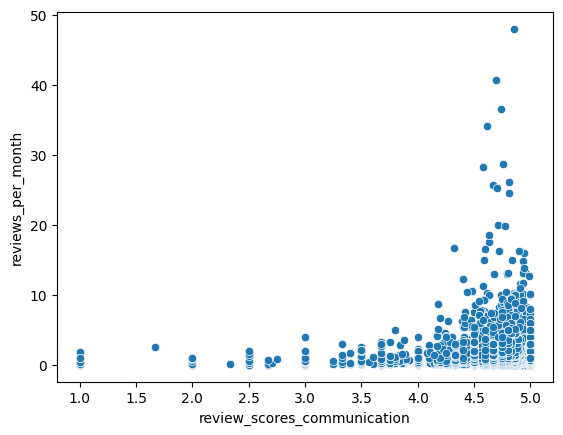

In [226]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', data=private_room_data)

In [227]:
Vars_Indep= private_room_data[['review_scores_communication']]
Var_Dep= private_room_data['reviews_per_month']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [228]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19186247]),
 'rank_': 1,
 'singular_': array([48.27812325]),
 'intercept_': 0.48394579084360057}

In [229]:
y_pred= model.predict(X=private_room_data[['review_scores_communication']])
private_room_data.insert(0, 'Predicciones6', y_pred)
print(private_room_data)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print(coef_Correl)

       Predicciones6  Predicciones5  Predicciones4  Predicciones3  \
7           1.433665     249.668483       4.930378      89.375938   
16          1.366513     255.006270       4.478211      86.193548   
17          1.404886     255.006270       4.736592      86.193548   
18          1.404886     255.474497       4.736592      85.914391   
21          1.435584     255.474497       4.891621      85.914391   
...              ...            ...            ...            ...   
24200       1.443258     255.474497       4.994974      85.914391   
24213       1.443258     255.474497       4.994974      85.914391   
24215       1.443258     255.474497       4.994974      85.914391   
24218       1.443258     255.474497       4.994974      85.914391   
24221       1.443258     255.474497       4.994974      85.914391   

       Predicciones2  Predicciones1  host_acceptance_rate  host_response_rate  \
7          87.361224      90.720415                 100.0               100.0   
16       

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

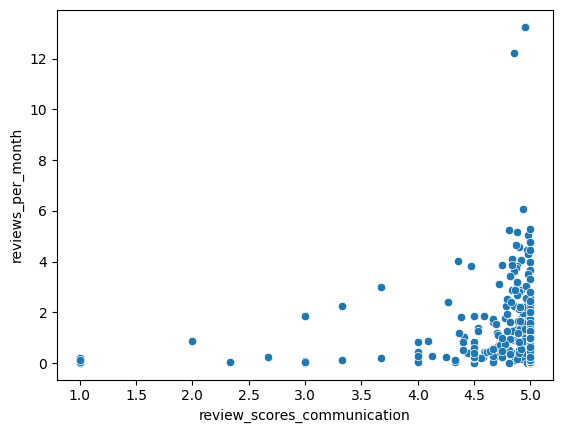

In [230]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', data=shared_room_data)

In [231]:
Vars_Indep= shared_room_data[['review_scores_communication']]
Var_Dep= shared_room_data['reviews_per_month']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [232]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29703603]),
 'rank_': 1,
 'singular_': array([14.44939766]),
 'intercept_': -0.17401599585910565}

In [236]:
y_pred= model.predict(X=shared_room_data[['review_scores_communication']])
y_pred

array([1.31116417, 1.31116417, 1.28443093, 1.22799408, 1.28146057,
       1.31116417, 1.26660877, 1.31116417, 1.22205336, 1.29334201,
       1.16264616, 1.27551985, 1.28740129, 1.31116417, 1.29928273,
       1.22799408, 1.24581625, 1.11215003, 1.31116417, 1.16264616,
       1.28740129, 1.27254949, 1.29334201, 1.27551985, 1.31116417,
       1.30225309, 1.31116417, 1.28740129, 1.31116417, 1.31116417,
       1.30225309, 1.16264616, 0.12302004, 1.26957913, 1.31116417,
       1.28740129, 1.27551985, 1.31116417, 1.30225309, 0.12302004,
       1.31116417, 1.28740129, 1.31116417, 0.51807796, 1.18640904,
       1.1893794 , 0.12302004, 1.31116417, 0.12302004, 1.01412814,
       1.31116417, 1.31116417, 1.21314228, 0.12302004, 1.29631237,
       1.19234976, 1.21314228, 0.815114  , 1.31116417, 0.12302004,
       1.18046832, 1.29928273, 1.26660877, 0.71709211, 1.05274282,
       1.21314228, 1.22502372, 1.17155724, 1.31116417, 1.31116417,
       1.29928273, 1.23690516, 1.25472733, 1.28443093, 1.29037

In [237]:
shared_room_data.insert(0, 'Predicciones6.1', y_pred)
shared_room_data

,Predicciones6.1,Predicciones5.1,Predicciones4.1,Predicciones3.1,Predicciones2.1,Predicciones1.1,id,listing_url,scrape_id,last_scraped,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
174,1.311164,297.806106,5.000063,81.258928,84.407715,88.738323,617137,https://www.airbnb.com/rooms/617137,20230329041210,2023-03-30,...,4.94,5.00,5.00,4.75,f,1,0,0,1,0.21
437,1.311164,295.815558,4.777410,83.950290,83.246003,69.470588,5272066,https://www.airbnb.com/rooms/5272066,20230329041210,2023-03-30,...,4.89,5.00,4.78,4.89,f,2,0,0,2,0.10
443,1.284431,282.324061,4.991816,102.191743,83.436658,84.884776,6076798,https://www.airbnb.com/rooms/6076798,20230329041210,2023-03-29,...,4.94,4.91,4.68,4.93,t,1,0,0,1,0.73
472,1.227994,292.276804,4.620729,88.734933,83.310029,88.738323,5434219,https://www.airbnb.com/rooms/5434219,20230329041210,2023-03-30,...,4.68,4.72,4.80,4.60,f,2,0,1,1,0.26
499,1.281461,267.505531,4.736178,122.227437,83.344176,88.738323,7480645,https://www.airbnb.com/rooms/7480645,20230329041210,2023-03-30,...,4.86,4.90,4.90,4.57,f,2,0,1,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,1.311164,297.806106,5.049541,81.258928,83.294378,88.738323,845810769434337346,https://www.airbnb.com/rooms/845810769434337346,20230329041210,2023-03-29,...,5.00,5.00,5.00,5.00,t,12,1,3,8,1.00
23762,1.311164,297.806106,5.049541,81.258928,83.275882,88.738323,844088337964077991,https://www.airbnb.com/rooms/844088337964077991,20230329041210,2023-03-30,...,5.00,5.00,5.00,5.00,f,1,0,0,1,1.00
23894,1.311164,297.806106,4.637222,81.258928,83.628735,88.738323,850838789025926092,https://www.airbnb.com/rooms/850838789025926092,20230329041210,2023-03-30,...,5.00,5.00,5.00,4.50,f,2,0,0,2,2.00
23898,1.311164,297.806106,4.637222,81.258928,83.241735,88.738323,847284366694948562,https://www.airbnb.com/rooms/847284366694948562,20230329041210,2023-03-30,...,5.00,5.00,5.00,4.50,f,1,0,0,1,2.00


In [238]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.02479876952277027

In [239]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.15747625066266427